In [1]:

#mathhmatical modules =====================================
import numpy as np
import math
#==========================================================
#scikit-learning modules ==================================
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt,image
#==========================================================
#scikit-image =============================================
import skimage.io as io
from skimage.exposure import histogram
from skimage.color import rgb2gray,rgb2hsv,label2rgb
from skimage.util import random_noise
from skimage.feature import canny
from skimage.measure import label
from skimage.filters import gaussian,thresholding,threshold_otsu
import skimage.restoration as resto
from skimage import img_as_float,img_as_ubyte
import skimage.segmentation as seg
#==========================================================
#scipy lib for transformative operations ==================
from scipy.signal import convolve2d
from scipy import fftpack,ndimage
#==========================================================
#Comprehensive Image libraries ============================
import cv2 
import cvlib as cv
#==========================================================
#quality assessment modules ===============================
import imquality.brisque as brisque
#==========================================================
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances


d:\conda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
d:\conda\Lib\site-packages\libsvm\svm.py:148: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


In [ ]:

def get_quality(img):
    return brisque.score(img)
def scale_scapec_sift(image: str):
    image = rgb2gray(io.imread(image))
    size = image.shape
    k = math.sqrt(2)
    space = np.zeros((5,))
    iterations = int(np.floor(math.log2(np.max(size))))
    scales = []
    img = image
    for iteration in range(iterations):
        temp_size = img.shape
        if temp_size[0]//2 > 0 and temp_size[1]//2 > 0:
            scales.append(img)
            img = cv2.resize(img,(temp_size[0]//2,temp_size[1]//2))

    for i in range(len(scales)):
        original = scales[i]
        scales[i] = []
        for j in range(5):
            scales[i].append(gaussian(original,k**j))
    for i in range(len(scales)):
        for j in range(5):
            io.imshow(scales[i][j])
    return scales

In [ ]:
def DoG(scales):
    differences = np.zeros([len(scales),len(scales[0])])
    for i in range(len(scales)):
        for j in range(1,len(scales[i])-1):
            differences[i][j] = np.subtract(scales[i][j-1],scales[i][j+1])
    return differences

In [6]:
img = cv2.imread("knife.jpg")
gray = cv2.cvtColor(img,code=cv2.COLOR_BGR2GRAY)
def panopatic_segmentation(img: np.ndarray,clusters: int):
    # pyramid = np.ndarray([cv2.resize(img,size = (img.shape[0]//(scaling_factor**i),img.shape[1]//(scaling_factor**i))) for i in range(1,np.max(img.shape)%scaling_factor)])
    newimg = np.copy(img)
    X = newimg.reshape(-1, 3) 
    model = KMeans(n_clusters=clusters,n_init=10)
    model.fit(X)
    segmented_img = model.cluster_centers_[model.labels_]
    segmented_img = segmented_img.reshape(newimg.shape)
    return segmented_img,model.cluster_centers_
def find_boundries_n_centers(img: np.ndarray):
    _, thresh = cv2.threshold(img,np.mean(img),255,cv2.THRESH_BINARY_INV)
    cnts, hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(cnts, key=cv2.contourArea)
    return cnt

TypeError: unhashable type: 'numpy.ndarray'

: 

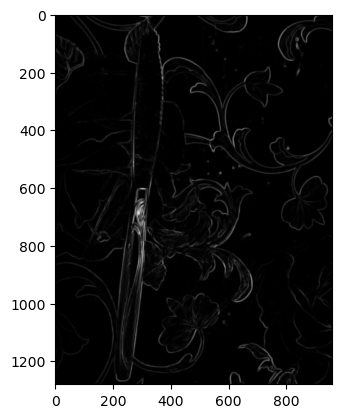

In [5]:
img = io.imread("knife.jpg",as_gray=True)
k = 7 #texel size
img_mean = ndimage.uniform_filter(img,(k,k))
img_sqr_mean = ndimage.uniform_filter(img**2,(k,k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var,cmap="gray")

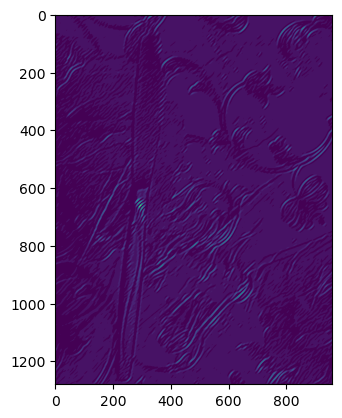

In [6]:
ksize = 45
theta= np.pi/4
kernel = cv2.getGaborKernel((ksize,ksize), 5.0, theta, 10.0, 0.9, 0, ktype= cv2.CV_32F)
filtered_image = cv2.filter2D(img,cv2.CV_8UC3,kernel)
plt.imshow(filtered_image)


## Object Segmentation with openCV

In [8]:
import cv2

# get all filenames in test_images folder 
import os
path = "test_images"
filenames = os.listdir(path)
filenames = [f for f in filenames]

filenames = filenames[:2]

In [9]:
results_path = "results"

for file in filenames:
    img = cv2.imread(os.path.join(path,file))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    edges=cv2.Canny(gray,100,200)
    cv2.waitKey(0)
    cv2.imshow('edges', edges)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
    closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    cv2.imshow("Closed", closed)
    cv2.waitKey(0)
    i=0
    cnts,heir= cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        cv2.drawContours(img, [approx], -1, (0, 255, 0), 2)
        x,y,w,h =cv2.boundingRect(c)
        i=i+1
        newImage=img[y:y+h,x:x+w]
        #make a folder and throw the results there with each image name
        if not os.path.exists(results_path):
            os.makedirs(results_path)
        final = results_path +  '/' + str(i)+'.jpg'
        cv2.imwrite(final,newImage)

    cv2.imshow('dst_rt', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
